In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_estimator.python.estimator.api._v2.estimator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from state import State
import time
from timeit import default_timer as timer
import random
import chess
import chess.svg
import chess.polyglot
import os
from anytree import Node, RenderTree
from anytree.exporter import UniqueDotExporter
import matplotlib.pyplot as plt
import seaborn as sns



print(tf.__version__)

2.2.0


/Users/xtreemtg888/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
os.listdir("games")

['.DS_Store', 'Yonah', 'Caruana', 'Carlsen', 'Kasparov', 'Wei']

In [2]:
from IPython.display import HTML
style = "<style>svg{width:30% !important;height:30% !important;}</style>"
HTML(style)

In [3]:
dat = np.load("grandmasters_dataset12x8x8.npz")
X = dat['arr_0']
y = dat['arr_1']


In [4]:
X.shape

(450344, 12, 8, 8)

In [5]:
y.shape

(450344,)

In [6]:
unique, counts = np.unique(y, return_counts=True)

np.asarray((unique, counts)).T

array([[    -1, 182783],
       [     1, 267561]])

In [7]:
def build_model():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(X.shape[1:])))
    model.add(Conv2D(32, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    model.summary()
    return model

In [8]:
model = build_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 10, 6, 64)         4672      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 4, 32)          18464     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1025      
Total params: 24,161
Trainable params: 24,161
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(X, y, epochs=25, batch_size=32)

Epoch 1/25
14074/14074 [==============================] - 72s 5ms/step - loss: 0.7792 - mse: 0.7792
Epoch 2/25
14074/14074 [==============================] - 77s 5ms/step - loss: 0.6287 - mse: 0.6287
Epoch 3/25
14074/14074 [==============================] - 82s 6ms/step - loss: 0.5655 - mse: 0.5655
Epoch 4/25
14074/14074 [==============================] - 75s 5ms/step - loss: 0.5301 - mse: 0.5301
Epoch 5/25
14074/14074 [==============================] - 58s 4ms/step - loss: 0.5074 - mse: 0.5074
Epoch 6/25
14074/14074 [==============================] - 77s 5ms/step - loss: 0.4916 - mse: 0.4916
Epoch 7/25
14074/14074 [==============================] - 79s 6ms/step - loss: 0.4781 - mse: 0.4781
Epoch 8/25
14074/14074 [==============================] - 86s 6ms/step - loss: 0.4670 - mse: 0.4670
Epoch 9/25
14074/14074 [==============================] - 81s 6ms/step - loss: 0.4584 - mse: 0.4584
Epoch 10/25
14074/14074 [==============================] - 90s 6ms/step - loss: 0.4501 - mse: 0.4501

In [314]:
board = chess.Board("8/5r2/3R2R1/1p2kp1p/8/1r5P/5PK1/8 w - - 0 46")
og = chess.svg.board(board=board) 
board.push_san('Rde6')
pos1 = chess.svg.board(board=board) 
no_wrap_div = '<div style="white-space: nowrap">{}{}</div>'
display(HTML(no_wrap_div.format(og, pos1)))

NameError: name 'HTML' is not defined

In [28]:
board = chess.Board("8/5r2/3R2R1/1p2kp1p/8/1r5P/5PK1/8 w - - 0 46")
board.push_san('Rd7')
pos2 = chess.svg.board(board=board) 
board.pop()
board.push_san('f4')
pos3 = chess.svg.board(board=board) 
display(HTML(no_wrap_div.format(pos2, pos3)))

In [320]:
board = chess.Board("8/5r2/3R2R1/1p2kp1p/8/1r5P/5PK1/8 w - - 0 46")
og = State(board).serialize()
board.push_san('Rde6')
pos1 = State(board).serialize()
board.pop()
board.push_san('Rd7')
pos2 = State(board).serialize()
board.pop()
board.push_san('f4')
pos3 = State(board).serialize()

In [380]:
model.predict(np.asarray([og, pos1,pos2, pos3]),  batch_size=4)

array([[0.42792535],
       [0.16721539],
       [0.39041525],
       [0.433652  ]], dtype=float32)

In [21]:



start = timer()
model.predict(np.asarray([pos2]),  batch_size=1)
end = timer()
end - start

0.025386092020198703

In [22]:
start = timer()
model.predict(np.asarray([pos3]),  batch_size=1)
end = timer()
end - start

0.03867579100187868

In [11]:
start = timer()
xx = 9 + 8
end = timer()
end - start

6.688293069601059e-05

In [14]:
lst = []
for x in X[:150]:
    start = timer()
    model.predict(np.array([x]), batch_size=128)
    end = timer()
    lst.append(end - start)
np.mean(lst)

0.021122019733302296

In [12]:
lst = []
for i in range(100):
    start = timer()
    model.predict(X[np.random.randint(0, 401575, 1000)], batch_size=1000)
    end = timer()
    lst.append(end - start)
np.mean(lst)

0.03424556607846171

In [10]:
rand_positions = X[np.random.randint(0, 450344, 2)]

In [30]:
ex = chess.Board('8/8/8/8/8/5K2/4Q3/k1q5 w - - 0 1')
ser = State().binary_encode(ex)
ser.shape

(12, 8, 8)

In [31]:
model.predict(np.array([ser]))[0,0]

0.7462198

In [29]:
model.layers

In [44]:
model.layers[0].get_weights()[0].shape, model.layers[0].get_weights()[1].shape

((3, 3, 8, 64), (64,))

In [45]:
model.layers[1].get_weights()[0].shape, model.layers[1].get_weights()[1].shape

((3, 3, 64, 32), (32,))

In [46]:
model.layers[3].get_weights()[0].shape, model.layers[3].get_weights()[1].shape

((128, 1), (1,))

In [65]:
rand_positions.shape

(2, 5, 8, 8)

In [95]:
ws = model.layers[0].get_weights()
ws2 = model.layers[1].get_weights()
ws_final = model.layers[3].get_weights()
np.matmul(ws[0].T, rand_positions) + ws[1]

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 8 is different from 3)

In [101]:
np.set_printoptions(suppress=True)
pred = np.dot(rand_positions,ws[0]) + ws[1]
pred = np.dot(pred,ws2[0]) + ws2[1]
pred = np.dot(pred.reshape(-1,128),ws_final[0]) + ws_final[1]
pred.shape

(1620, 1)

In [12]:
model.save('model-12x8x8')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model-12x8x8/assets


In [272]:
tf.__version__

'2.1.0'

In [109]:
max(-3.1, -3.2)

-3.1

In [131]:
x = 0
def predict_eval(ser_position):
    global x
    x+=1
    #return random.uniform(-1.0, 1.0)
        
    return model.predict(np.asarray([ser_position]))[0,0]
    

def eval_leaves(moves):
    evals = []
    for move in moves:
        s.board.push(move)
        ser = s.serialize()
        val = predict_eval(ser)
        evals.append((move, val))
        s.board.pop()
    return evals

def min_max_tree(position, depth=0):
    print(position)
    if depth == 0:
        return predict_eval(State(position).serialize())
    if position.turn:
        max_eval = -1.0
        for move in position.legal_moves:
            position.push(move)
            pred_eval = min_max_tree(position, depth - 1)
            position.pop()
            max_eval = max(max_eval, pred_eval)
        return max_eval
    else:
        min_eval = 1.0
        for move in position.legal_moves:
            position.push(move)
            pred_eval = min_max_tree(position, depth - 1)
            position.pop()
            min_eval = min(max_eval, pred_eval)
        return min_eval
        
            

In [107]:
def computer_move(depth = 0, verbose = False):
    eval_moves = min_max_tree(depth)
    best = sorted(eval_moves, key = lambda x:x[1], reverse=s.board.turn)[0][0]
    if verbose:
        print(s.board.san(best))
    s.board.push(best)
    
def random_move(verbose=True):
    moves = s.legal_moves()
    m = random.choice(moves)
    if verbose:
        print(s.board.san(m))
    s.board.push(m)



In [132]:
starting_pos = chess.Board()
print([mov for mov in starting_pos.legal_moves])
min_max_tree(starting_pos, 1)

[Move.from_uci('g1h3'), Move.from_uci('g1f3'), Move.from_uci('b1c3'), Move.from_uci('b1a3'), Move.from_uci('h2h3'), Move.from_uci('g2g3'), Move.from_uci('f2f3'), Move.from_uci('e2e3'), Move.from_uci('d2d3'), Move.from_uci('c2c3'), Move.from_uci('b2b3'), Move.from_uci('a2a3'), Move.from_uci('h2h4'), Move.from_uci('g2g4'), Move.from_uci('f2f4'), Move.from_uci('e2e4'), Move.from_uci('d2d4'), Move.from_uci('c2c4'), Move.from_uci('b2b4'), Move.from_uci('a2a4')]
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . N
P P P P P P P P
R N B Q K B . R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . N . .
P P P P P P P P
R N B Q K B . R
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . N . . . . .
P P P P P P P P
R . B Q K B N R
r n b q k b n r
p p p p p p

0.44430694

In [127]:
print(starting_pos)


r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


In [108]:
game = chess.Board()
s = State(game)
while not game.is_game_over():
    computer_move(verbose=True)

Na3
d5
f4
b5
Kf2
e5
fxe5
Bxa3
Ke3
Qh4
b4
Qh3+
gxh3
f5
exf6
Nh6
fxg7
Bf5
h4
Nc6
Qe1
Bd3
h5
Kf7
cxd3
Nxb4
h4
Nxd3
Bb2
Nxe1
Kd4
Nf3+
Nxf3
Bb4
Ne5+
Ke7
g8=N+
Kd6
Rb1
c5+
Kd3
c4+
Kd4
Re8
Nxc4+
bxc4
Bh3
Ng4
Bxg4
Re4#


In [252]:
abs(-15.6)

15.6

In [254]:
x = {'f': [1,2,3], 'g': [3,4,5]}
x['f'] = 8
x

{'f': 8, 'g': [3, 4, 5]}

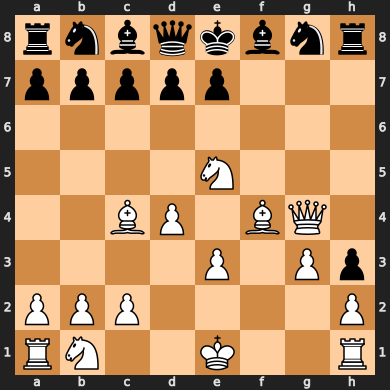

In [446]:
bb = chess.Board('rnbqkbnr/ppppp3/8/4N3/2BP1BQ1/4P1Pp/PPP4P/RN2K2R w Kk - 5 55')
bb

In [369]:
chess.Bitboard(fen = 'rnbqkbnr/ppppp3/8/4N3/2BP1BQ1/4P1Pp/PPP4P/RN2K2R w Kk - 5 55')

TypeError: 'fen' is an invalid keyword argument for this function

In [ ]:
board = chess.Board()

WP = board.pieces(chess.PAWN, chess.WHITE)
BP = board.pieces(chess.PAWN, chess.BLACK)

In [428]:
w_pawn = (np.asarray(board.pieces(chess.PAWN, chess.WHITE).tolist())).astype(int)
w_rook = (np.asarray(board.pieces(chess.ROOK, chess.WHITE).tolist())).astype(int)
w_knight = (np.asarray(board.pieces(chess.KNIGHT, chess.WHITE).tolist())).astype(int)
w_bishop = (np.asarray(board.pieces(chess.BISHOP, chess.WHITE).tolist())).astype(int)
w_queen = (np.asarray(board.pieces(chess.QUEEN, chess.WHITE).tolist())).astype(int)
w_king = (np.asarray(board.pieces(chess.KING, chess.WHITE).tolist())).astype(int)

b_pawn = (np.asarray(board.pieces(chess.PAWN, chess.BLACK).tolist())).astype(int)
b_rook = (np.asarray(board.pieces(chess.ROOK, chess.BLACK).tolist())).astype(int)
b_knight = (np.asarray(board.pieces(chess.KNIGHT, chess.BLACK).tolist())).astype(int)
b_bishop = (np.asarray(board.pieces(chess.BISHOP, chess.BLACK).tolist())).astype(int)
b_queen = (np.asarray(board.pieces(chess.QUEEN, chess.BLACK).tolist())).astype(int)
b_king = (np.asarray(board.pieces(chess.KING, chess.BLACK).tolist())).astype(int)

np.vstack((w_pawn, w_rook, w_knight, w_bishop, w_queen, w_king,
                       b_pawn, b_rook, b_knight, b_bishop, b_queen, b_king))[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [420]:
int(True)

1

In [418]:
int(board.has_kingside_castling_rights(chess.BLACK))

1

In [435]:
board.ep_square

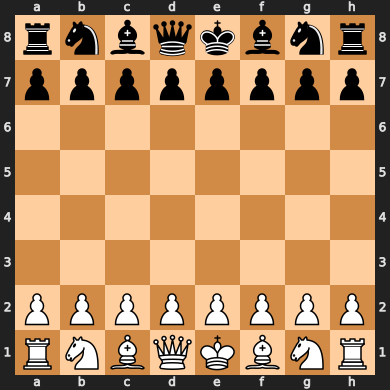

In [449]:
board.BaseBoard()

In [451]:
state = np.zeros(768)
x = 0
for i in range(1,7):
    idx = np.array(list(board.pieces(i, chess.WHITE))) + x
    state[idx] = 1
    x += 64
for i in range(1,7):
    idx = np.array(list(board.pieces(i, chess.BLACK))) + x
    state[idx] = 1
    x += 64
    

# if board.ep_square and board.has_legal_en_passant():
#     idx = board.ep_square + x
#     state[idx] = 1
    
# state[-5] = int(board.turn)
# state[-4] = int(board.has_kingside_castling_rights(chess.WHITE))
# state[-3] = int(board.has_queenside_castling_rights(chess.WHITE))
# state[-2] = int(board.has_kingside_castling_rights(chess.BLACK))
# state[-1] = int(board.has_queenside_castling_rights(chess.BLACK))

state.reshape((12,8,8))


array([[[0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 1., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0

In [427]:
state = np.zeros((13,8,8))
for i in range(1,7):
    cc = np.zeros(64)
    idx = list(board.pieces(i, chess.WHITE))
    cc[idx] = 1
    state[i-1] = cc.reshape((8,8))

for i in range(1,7):
    cc = np.zeros(64)
    idx = list(board.pieces(i, chess.BLACK))
    cc[idx] = 1
    state[i+5] = cc.reshape((8,8))
    
if board.ep_square and board.has_legal_en_passant():
    cc = np.zeros(64)
    cc[self.board.ep_square] = 1
    state[13] = cc.reshape((8,8))

    
    

In [391]:
cc = np.zeros(64)
cc[list(board.pieces(chess.PAWN, chess.WHITE))] = 1
cc.reshape((8,8))


array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [407]:
list(board.pieces(chess.ROOK, chess.BLACK))

[56, 63]

In [379]:
print (int(WP), int (BP))

print (list(WP), list(BP))

print ("\nWHITE PAWNS:\n" + str(WP))

print ("\nBLACK PAWNS:\n" + str(BP))

65280 71776119061217280
[8, 9, 10, 11, 12, 13, 14, 15] [48, 49, 50, 51, 52, 53, 54, 55]

WHITE PAWNS:
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
1 1 1 1 1 1 1 1
. . . . . . . .

BLACK PAWNS:
. . . . . . . .
1 1 1 1 1 1 1 1
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .


In [368]:
np.asarray(list(bin(bb.castling_rights)[2:])).reshape((8,8))

array([['1', '0', '0', '0', '0', '0', '0', '0'],
       ['0', '0', '0', '0', '0', '0', '0', '0'],
       ['0', '0', '0', '0', '0', '0', '0', '0'],
       ['0', '0', '0', '0', '0', '0', '0', '0'],
       ['0', '0', '0', '0', '0', '0', '0', '0'],
       ['0', '0', '0', '0', '0', '0', '0', '0'],
       ['0', '0', '0', '0', '0', '0', '0', '0'],
       ['1', '0', '0', '0', '0', '0', '0', '0']], dtype='<U1')

In [256]:
dirs = 'Carlsen'
for games in os.listdir("games" + '/' + dirs):
    print(f'Parsing game: {games} in {dirs})
    pgn = open(os.path.join("games" + '/' + dirs, games))
    game = chess.pgn.read_game(pgn)
    for move in 

NameError: name 'dirs' is not defined

In [244]:
chess.polyglot.zobrist_hash(bb)

7778068542419706644

In [238]:
chess.polyglot.zobrist_hash(bb)

1210181367742106877

In [71]:
l = [1,2,3,4]
l.insert(len(l), 5)
l

[1, 2, 3, 4, 5]

In [195]:
bb.san(movee)

NameError: name 'movee' is not defined

In [227]:
bool(bb.attackers(True, chess.G8))

True

In [217]:
for piece in bb.attackers(True, chess.G8):
    print(piece)

26
30


In [225]:
chess.piece_symbol(3)

'b'

In [223]:
chess.piece_name(1)

'pawn'

In [218]:
print(bb.piece_type_at(chess.H8))

4


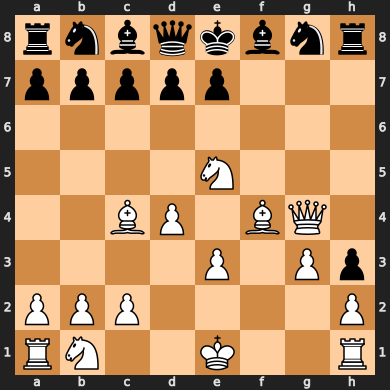

In [197]:
bb

In [117]:


legals = [move for move in bb.legal_moves]
print([bb.san(move) for move in bb.legal_moves])
for i in range(len(legals)):
    #checks if move is a pawn capture
    if bb.san(legals[i])[-1] == '#':
        legals.insert(0, legals.pop(i))
        break #return
    if bb.san(legals[i])[0].islower() and bb.is_capture(legals[i]):
        legals.insert(0, legals.pop(i))

for i in range(len(legals)- 1, -1, -1):
    #puts queen going to dumb square in the back
    if bb.san(legals[i])[0] == 'Q' and bb.is_attacked_by(not bb.turn ,legals[i].to_square):
            legals.insert(len(legals), legals.pop(i))
    #same with rook, knight and bishop but only when it doesn't capture anything
    if bb.san(legals[i])[0] in 'RBN' and bb.is_attacked_by(not bb.turn ,legals[i].to_square) \
    and not bb.is_capture(legals[i]) and len(bb.attackers(not bb.turn,legals[i].to_square)) > len(bb.attackers(bb.turn,legals[i].to_square)):
            legals.insert(len(legals), legals.pop(i))
        
        
print('\n',[bb.san(move) for move in legals])

['Nf7', 'Nxd7', 'Ng6', 'Nc6', 'Nf3', 'Nd3', 'Qxg8', 'Qg7', 'Qxd7+', 'Qg6#', 'Qe6', 'Qh5+', 'Qg5', 'Qf5', 'Qh4', 'Qxh3', 'Qf3', 'Qe2', 'Qd1', 'Bh6', 'Bg5', 'Bxg8', 'Bf7#', 'Be6', 'Ba6', 'Bd5', 'Bb5', 'Bd3', 'Bxb3', 'Be2', 'Bf1', 'Rg1', 'Rf1', 'Kf2', 'Ke2', 'Kd2', 'Kf1', 'Kd1', 'Nc3', 'Na3', 'Nd2', 'O-O', 'cxb3', 'axb3', 'd5', 'e4', 'c3', 'a3', 'a4']

 ['Qg6#', 'Nf7', 'Nxd7', 'Ng6', 'Nf3', 'Nd3', 'Qg5', 'Qf5', 'Qf3', 'Qe2', 'Qd1', 'Bg5', 'Bxg8', 'Bf7#', 'Be6', 'Bd5', 'Bb5', 'Bd3', 'Bxb3', 'Be2', 'Bf1', 'Rg1', 'Rf1', 'Kf2', 'Ke2', 'Kd2', 'Kf1', 'Kd1', 'Nc3', 'Na3', 'Nd2', 'O-O', 'cxb3', 'axb3', 'd5', 'e4', 'c3', 'a3', 'a4', 'Ba6', 'Bh6', 'Qxh3', 'Qh4', 'Qh5+', 'Qe6', 'Qxd7+', 'Qg7', 'Qxg8', 'Nc6']


In [105]:
chess.Move(chess.E5, chess.F7).to_square

53

In [104]:
len(bb.attackers(True,chess.F7))

2

In [74]:
'Qg2', 'Qf2', 'Qe2', 'Qh1', 'Qf1', 'Qd1', 'f7', 'h5'
'Qg2', 'Qf2', 'Qe2', 'Qh1', 'Qf1', 'Qd1', 'fxe7', 'f7', 'h5'

31

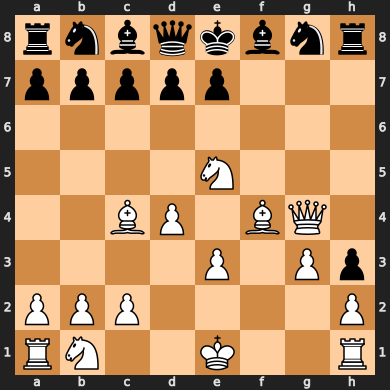

In [3]:
chess.svg.board(bb)

In [136]:
piece_values = {
            # pawn
            1:1,
            # bishop
            2:3,
            # knight
            3:3,
            # rook
            4:5,
            # queen
            5:9,
            # king
            6:100
        }
white_val, black_val = 0, 0
for i in range(1,7):
    white_val += len(bb.pieces(i, True)) * piece_values[i]
    black_val += len(bb.pieces(i, False)) * piece_values[i]
white_val - black_val

1

In [77]:
y = [1,2,3,4]
y.insert(3, 2)
y

[1, 2, 3, 2, 4]

In [170]:
bb = chess.Board('6k1/8/PPPPPPPP/8/8/pppppppp/8/6K1 b - - 4 65')
bb.fen()

'6k1/8/PPPPPPPP/8/8/pppppppp/8/6K1 b - - 4 65'

In [ ]:
rnb1kbn1/1p1q4/8/p1N1p3/P3Kp2/5P2/1P6/8 b q - 1 24

rnb1kbnr/1p1p1pp1/8/2q1p2p/p1N1P3/2N1B3/PPP2PPP/R2QKB1R b KQkq - 5 9 

with this fen: rnbqkb1r/pppppppp/8/8/3Q2n1/7P/PPPPPPP1/RNB1KBNR w KQkq - 0 1
on depth 6, 
these are the lengths of time it took

sorting the best moves in each node:
position 0
```{'move': 'hxg4', 'eval': 0.02142857142857143```
```91.90624986903276 seconds```
```508548 number of predictions made```

sorting on only the first 2 depths:
```{'move': 'hxg4', 'eval': 0.02142857142857143}```
```15.072585907066241 seconds```
```276982 number of predictions made```

not sorting the moves
```{'move': 'hxg4', 'eval': 0.02142857142857143}```
```53.188335754093714 seconds```
```1018687 number of predictions made```


we see that sorting on a couple layers provides the fastest results


In [153]:
pawn= np.array([
        0, 0, 0, 0, 0, 0, 0, 0,
        5, 10, 10, -20, -20, 10, 10, 5,
        5, -5,-10,  0,  0,-10, -5,  5,
        0,  0,  0, 20, 20,  0,  0,  0,
        5, 5, 10, 25, 25, 10, 5, 5,
        10, 10, 20, 30, 30, 20, 10, 10,
        50, 50, 50, 50, 50, 50, 50, 50,
        0, 0, 0, 0, 0, 0, 0, 0
    ])

In [157]:
np.array(list(bb.pieces(1, True))), np.array(list(bb.pieces(1, False)))

(array([40, 41, 42, 43, 44, 45, 46, 47]), array([16, 17, 18, 20]))

In [163]:
pawn[list(bb.pieces(1, True))]

array([10, 10, 20, 30, 30, 20, 10, 10])

In [164]:
pawn[-(np.array(list(bb.pieces(1, False))) + 1)]

array([10, 10, 20, 30, 30, 20, 10, 10])

In [165]:
 start = 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'
    game = ChessEngine(start)
    max_, min_ = 0,0
    for _ in range(100000):
        val = game.conventional_eval()
        max_ = max(max_,val[2])
        min_ = min(min_, val[2])
        game.board.push(np.random.choice(list(game.board.legal_moves)))
        if game.board.is_game_over():
            print(val)
            game = ChessEngine(start)
    print(max_, min_)

4

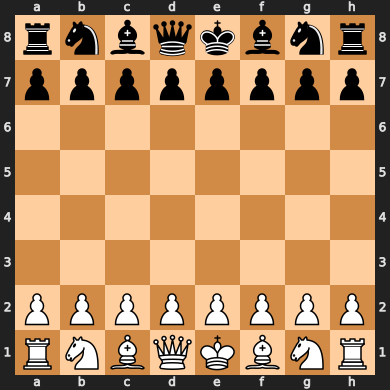

In [302]:
bb = chess.Board('6k1/8/PPPPPPPP/8/8/pppppppp/8/6K1 b - - 4 65')

bb.push_san('Kh8')
bb.reset_board()
bb

In [303]:
bb.piece_map()

{63: Piece.from_symbol('r'),
 62: Piece.from_symbol('n'),
 61: Piece.from_symbol('b'),
 60: Piece.from_symbol('k'),
 59: Piece.from_symbol('q'),
 58: Piece.from_symbol('b'),
 57: Piece.from_symbol('n'),
 56: Piece.from_symbol('r'),
 55: Piece.from_symbol('p'),
 54: Piece.from_symbol('p'),
 53: Piece.from_symbol('p'),
 52: Piece.from_symbol('p'),
 51: Piece.from_symbol('p'),
 50: Piece.from_symbol('p'),
 49: Piece.from_symbol('p'),
 48: Piece.from_symbol('p'),
 15: Piece.from_symbol('P'),
 14: Piece.from_symbol('P'),
 13: Piece.from_symbol('P'),
 12: Piece.from_symbol('P'),
 11: Piece.from_symbol('P'),
 10: Piece.from_symbol('P'),
 9: Piece.from_symbol('P'),
 8: Piece.from_symbol('P'),
 7: Piece.from_symbol('R'),
 6: Piece.from_symbol('N'),
 5: Piece.from_symbol('B'),
 4: Piece.from_symbol('K'),
 3: Piece.from_symbol('Q'),
 2: Piece.from_symbol('B'),
 1: Piece.from_symbol('N'),
 0: Piece.from_symbol('R')}

In [182]:
bb.fen()

'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - - 5 66'

In [287]:
c = np.load("test.npz")
c = c['arr_0']
c.shape

(112, 13)

In [288]:
cols = ['TT_move', 'TT_val', 'TT_time','TT_numpred', 'ID_move', 'ID_val', 'ID_time', 'ID_numpred',
       'IDTT_move', 'IDTT_val', 'IDTT_time', 'IDTT_numpred']
idx = c[:,0]
df = pd.DataFrame(c[:,1:], index = idx, columns = cols)
df

,TT_move,TT_val,TT_time,TT_numpred,ID_move,ID_val,ID_time,ID_numpred,IDTT_move,IDTT_val,IDTT_time,IDTT_numpred
Nf3,Nc6,0.014,0.72,3452,Nc6,-0.014,0.53,2861,Nc6,-0.014,0.51,2343
c5,Nc3,0.006,2.4,11185,Nc3,0.006,2.75,16000,Nc3,0.006,3.03,13530
e4,Nf6,0.029,1.58,7300,Nf6,-0.029,1.59,9013,Nf6,-0.029,3.01,13266
d6,Bb5+,0.011,3.68,16900,Bb5+,0.011,1.41,8286,Bb5+,0.011,1.66,7590
d4,Qb6,0.044,13.48,60432,Nd7,-0.044,6.21,34962,Nd7,-0.044,7.31,32090
...,...,...,...,...,...,...,...,...,...,...,...,...
Bf3,Ka6,0.031,0.45,2872,Be3,0.031,0.82,4896,Be3,0.031,0.76,4399
h4,Bb7,0.041,1.4,7733,Bh1,-0.041,2.03,12015,Bh1,-0.041,1.18,6450
Be4,Bd6,0.03,0.55,3428,h5,0.03,0.76,4556,h5,0.03,0.53,3085
h5,Bb7,0.043,1.15,6417,Bf3,-0.043,1.21,7104,Bh1,-0.043,1.12,6191


In [298]:
df['TT_time'] = df['TT_time'].astype(float)
df['TT_val'] = df['TT_val'].astype(float)
df['ID_val'] = df['ID_val'].astype(float)
df['ID_time'] = df['ID_time'].astype(float)
df['IDTT_val'] = df['IDTT_val'].astype(float)
df['IDTT_time'] = df['IDTT_time'].astype(float)

df['TT_numpred'] = df['TT_numpred'].astype(int)
df['ID_numpred'] = df['ID_numpred'].astype(int)
df['IDTT_numpred'] = df['IDTT_numpred'].astype(int)

43230.455357142855 48196.357142857145 43092.375


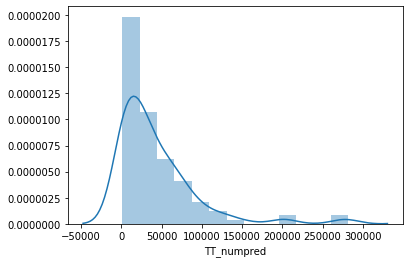

In [301]:
print(df['TT_numpred'].mean(),df['ID_numpred'].mean(), df['IDTT_numpred'].mean() )
sns.distplot(df['TT_numpred'])


In [15]:
3 in chess

TypeError: argument of type 'module' is not iterable

In [23]:
np.argmax(np.array([[1,'s'], [2,'hh'], [-2, 'xx']])[:,0])

1

In [50]:
np.argwhere(a[:,0].astype(float) == a[0,0].astype(float)).flatten()

array([0, 1, 2])

In [49]:
idx = np.random.choice(np.argwhere(a[:,0].astype(float) == a[0,0].astype(float)).flatten())

0

In [48]:
import chess_engine
from chess_engine import X, ChessEngine
chess_engine.set_X(0)
X

0

In [56]:
root = 0

In [49]:
fen = 'r2qkbr1/ppp1pppp/2n1b2n/8/8/5P2/PPPP2PP/RNB1KBNR b KQq - 0 6'
engine = ChessEngine(fen)
root = engine.test(5)
root

Node('/root: best is Qd6', depth=0, no='', val=-0.07142857142857142)

In [ ]:
np.argmax(np.array([[1,'s'], [2,'hh'], [-2, 'xx']])[:,0])

In [45]:
def move_order(root, depth, turn = True):
    move_order = []
    node = root
    turn = turn
    for i in range(depth):
        if len(node.children) == 0:
            return move_order
        #node = sorted(node.children, key = lambda x: x.val, reverse = turn)[0]
        #o(n) time instead of sorting
        nodes = np.array([[n.val, n] for n in node.children])
        best = nodes[np.argmax(nodes[:,0])] if turn else nodes[np.argmin(nodes[:,0])]
        move_order.append((round(best[0], 3), best[1].name))
        turn = not turn
        node = best[1]
    return move_order
    
    
    

In [55]:
move_order(root, 5, turn = False)

[(-0.071, 'Qd6'),
 (-0.071, 'Kd1'),
 (-0.071, 'Rh8'),
 (-0.071, 'Ne2'),
 (-0.071, 'Bxa2')]

In [57]:
root

0

In [58]:
sorted(root.children, key = lambda x: x.val)

AttributeError: 'int' object has no attribute 'children'

In [18]:
for line in UniqueDotExporter(root, 'minimaxtree'):
    print(line)

minimaxtree tree {
    "0x11040fe80" [label="root: best is Rh8"];
    "0x11040ff98" [label="Rh8"];
    "0x10fad6c18" [label="Nh3"];
    "0x639959358" [label="Rg8"];
    "0x639997f60" [label="Kd7"];
    "0x639997eb8" [label="Qc8"];
    "0x6399a3630" [label="Qb8"];
    "0x6399a36a0" [label="Qd7"];
    "0x6399a3710" [label="Qd6"];
    "0x6399a3780" [label="Qd5"];
    "0x6399a37f0" [label="Qd4"];
    "0x6399a3860" [label="Qd3"];
    "0x6399a38d0" [label="Qxd2+"];
    "0x6399a3828" [label="Rc8"];
    "0x6399a39b0" [label="Rb8"];
    "0x6399a3a20" [label="Ng8"];
    "0x6399a3a90" [label="Nf5"];
    "0x6399a3b00" [label="Ng4"];
    "0x6399a3b70" [label="Bc8"];
    "0x6399a3be0" [label="Bd7"];
    "0x6399a3c50" [label="Bf5"];
    "0x6399a3cc0" [label="Bd5"];
    "0x6399a3d30" [label="Bg4"];
    "0x6399a3da0" [label="Bc4"];
    "0x6399a3e10" [label="Bxh3"];
    "0x6399a3e80" [label="Bb3"];
    "0x6399a3ef0" [label="Bxa2"];
    "0x6399a3f60" [label="Nb8"];
    "0x6399a3fd0" [label="Ne5"];
    "0

    "0x639a709b0" [label="Kd7"];
    "0x639a70a20" [label="Qc8"];
    "0x639a70a90" [label="Qb8"];
    "0x639a70b00" [label="Qd7"];
    "0x639a70b70" [label="Qd6"];
    "0x639a70be0" [label="Qd5"];
    "0x639a70c50" [label="Qd4"];
    "0x639a70cc0" [label="Qd3"];
    "0x639a70d30" [label="Qxd2+"];
    "0x639a70c88" [label="Rc8"];
    "0x639a70e10" [label="Rb8"];
    "0x639a70e80" [label="Nf5"];
    "0x639a70ef0" [label="Ng4"];
    "0x639a70f60" [label="Nb8"];
    "0x639a70fd0" [label="Ne5"];
    "0x639a74080" [label="Na5"];
    "0x639a740f0" [label="Nd4"];
    "0x639a74160" [label="Nb4"];
    "0x639a741d0" [label="Bxc4"];
    "0x639a70438" [label="Bd3"];
    "0x639a74278" [label="Rh8"];
    "0x639a74320" [label="Kd7"];
    "0x639a74390" [label="Qc8"];
    "0x639a74400" [label="Qb8"];
    "0x639a74470" [label="Qd7"];
    "0x639a744e0" [label="Qd6"];
    "0x639a74550" [label="Qd5"];
    "0x639a745c0" [label="Qd4"];
    "0x639a74630" [label="Qxd3"];
    "0x639a74198" [label="Be2"];
    "0

    "0x639a059e8" -> "0x639a0e0b8";
    "0x639a059e8" -> "0x639a0e128";
    "0x639a059e8" -> "0x639a0e198";
    "0x639a05eb8" -> "0x639a0e0f0";
    "0x639a05eb8" -> "0x639a0e2b0";
    "0x639a05eb8" -> "0x639a0e320";
    "0x639a05eb8" -> "0x639a0e390";
    "0x639a05eb8" -> "0x639a0e400";
    "0x639a05eb8" -> "0x639a0e470";
    "0x639a05eb8" -> "0x639a0e4e0";
    "0x639a05eb8" -> "0x639a0e550";
    "0x639a05eb8" -> "0x639a0e5c0";
    "0x639a097f0" -> "0x639a0e630";
    "0x639a097f0" -> "0x639a0e6d8";
    "0x639a097f0" -> "0x639a0e748";
    "0x639a097f0" -> "0x639a0e7b8";
    "0x639a097f0" -> "0x639a0e828";
    "0x639a097f0" -> "0x639a0e898";
    "0x639a097f0" -> "0x639a0e908";
    "0x639a097f0" -> "0x639a0e978";
    "0x639a097f0" -> "0x639a0e9e8";
    "0x639a097f0" -> "0x639a0ea58";
    "0x639a09c88" -> "0x639a0e9b0";
    "0x639a09c88" -> "0x639a0eb70";
    "0x639a09c88" -> "0x639a0ebe0";
    "0x639a09c88" -> "0x639a0ec50";
    "0x639a09c88" -> "0x639a0ecc0";
    "0x639a09c88" -> "0x639a

    "0x639a587f0" -> "0x639a74198";
    "0x639a587f0" -> "0x639a74208";
    "0x639a587f0" -> "0x639a77128";
    "0x639a587f0" -> "0x639a775f8";
    "0x639a587f0" -> "0x639a7d160";
    "0x639a587f0" -> "0x639a80278";
    "0x639a587f0" -> "0x639a80748";
    "0x639a64240" -> "0x639a64c50";
    "0x639a64240" -> "0x639a64cf8";
    "0x639a64240" -> "0x639a64d68";
    "0x639a64240" -> "0x639a64dd8";
    "0x639a64240" -> "0x639a64e48";
    "0x639a64240" -> "0x639a64eb8";
    "0x639a64240" -> "0x639a64f28";
    "0x639a64240" -> "0x639a64f98";
    "0x639a64240" -> "0x639a67048";
    "0x639a64240" -> "0x639a64fd0";
    "0x639a64240" -> "0x639a670f0";
    "0x639a64240" -> "0x639a67198";
    "0x639a64240" -> "0x639a67208";
    "0x639a64240" -> "0x639a67278";
    "0x639a64240" -> "0x639a672e8";
    "0x639a64240" -> "0x639a67358";
    "0x639a64240" -> "0x639a673c8";
    "0x639a64240" -> "0x639a67438";
    "0x639a64240" -> "0x639a674a8";
    "0x639a64240" -> "0x639a67518";
    "0x639a64240" -> "0x639a

In [183]:
import pandas as pd


In [187]:
data = pd.DataFrame([[7, 2, 3, 5, 6, 3, 2, 7],
                [1, 1, 1, 1, 0, 1, 1, 1],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 1, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [9, 9, 9, 9, 9, 9, 9, 9],
                [15, 10, 11, 13, 14, 11, 10, 15]])
data

,0,1,2,3,4,5,6,7
0,7,2,3,5,6,3,2,7
1,1,1,1,1,0,1,1,1
2,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0
6,9,9,9,9,9,9,9,9
7,15,10,11,13,14,11,10,15


In [193]:
pd.get_dummies(data, columns = data.columns).values.reshape((-1,8, 8))

array([[[0, 0, 1, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0]],

       [[0, 0, 1, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 1, 0, 0]],

       [[0, 0, 1, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0]],

       [[0, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        